<a href="https://colab.research.google.com/github/sonudhakane7526/IPMV_MINI-PROJECT_B8_SEM6/blob/main/Counting_the_number_of_pipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
im = cv2.imread('/content/th.jpeg')

out = im.copy()
gry = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

bw = cv2.adaptiveThreshold(
    gry, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 12)

bw = cv2.medianBlur(bw, 3)
bw = cv2.erode(bw, np.ones((5, 5)))
bw = cv2.medianBlur(bw, 9)
bw = cv2.dilate(bw, np.ones((5, 5)))

cnts, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.circle(out, (x + w // 2, y + h // 2), max(w, h) // 2, (0, 255, 0), 2)

num_pipes = len(cnts)
print("Number of pipes:", num_pipes)
cv2.imwrite('output_image.jpg', out)

Number of pipes: 19


True

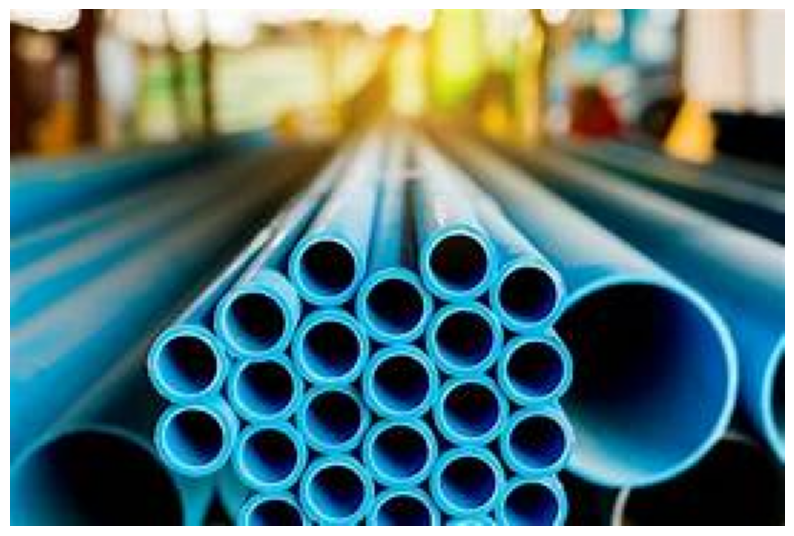

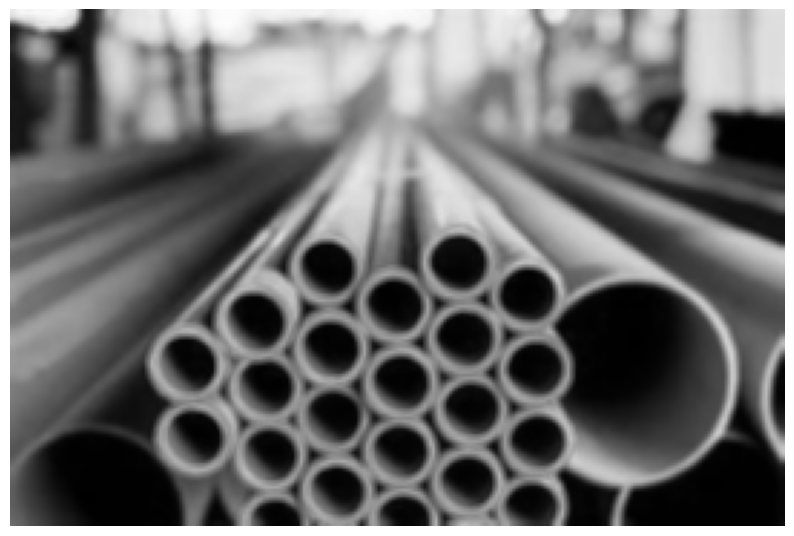

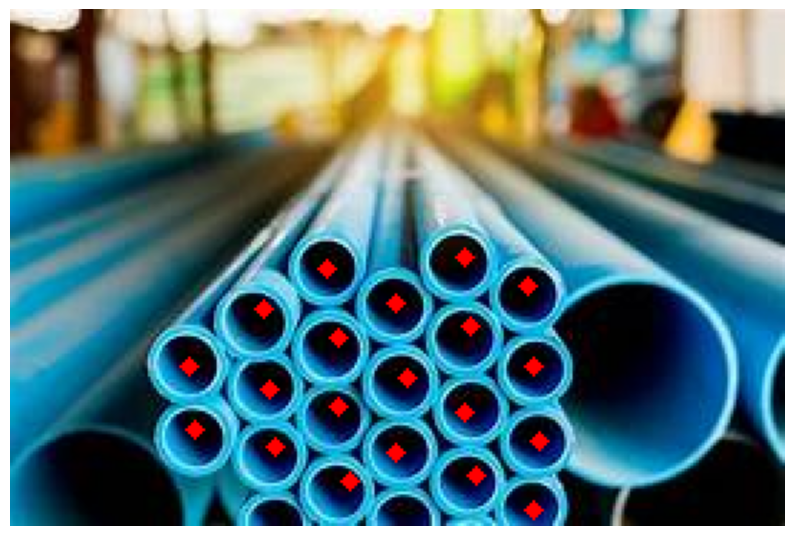

Number of pipes: 20


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image_url = '/content/th.jpeg'
img = cv2.imread(image_url, cv2.IMREAD_COLOR)

def show(img):
    plt.figure(figsize=(10, 16))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

show(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

show(gray_blurred)

detected_circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=15,
    param1=100,
    param2=20,
    minRadius=0,
    maxRadius=20
)

pipes_count = 0

if detected_circles is not None:

    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        pipes_count += 1

show(img)
print("Number of pipes:", pipes_count)
